In [5]:
import pickle

import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

from helping import rcparams, format_axis, format_axis_im
rcparams(1)

# Confusion Matrix

5-fold acc: 1.00


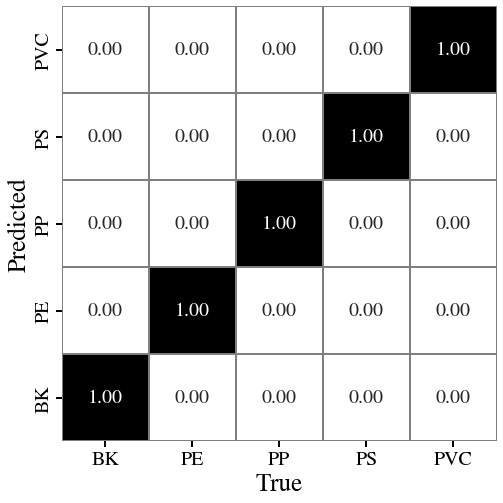

In [8]:
# load result
y_true = []
y_pred = []

for i in range(1, 6):
    with open(f'./pickle/both_train_{i}.pickle', 'rb') as handle:
        _ = pickle.load(handle)
        y_true_ = pickle.load(handle)
        y_pred_ = pickle.load(handle).argmax(axis=1)
    y_true.append(y_true_)
    y_pred.append(y_pred_)

y_true = np.array(y_true).ravel()
y_pred = np.array(y_pred).ravel()

acc = metrics.accuracy_score(y_true, y_pred)
print(f'5-fold acc: {acc:0.2f}')

conf = metrics.confusion_matrix(y_true, y_pred, normalize='pred')
conf = np.flipud(conf)
name = ['BK', 'PE', 'PP', 'PS', 'PVC']

# plot
fig, ax = plt.subplots(figsize=(8, 8))

sn.heatmap(conf, 
           annot=True, 
           cmap='gray_r',
           square=True, 
           vmax=1, 
           vmin=0, 
           fmt='0.2f', 
           linewidths=2, 
           linecolor='tab:gray', 
           cbar=False, 
           annot_kws={'fontsize':20})
ax.set_xlabel('True')
ax.set_ylabel('Predicted')
format_axis_im(ax)
plt.xticks(np.arange(0.5, 5, 1), name, horizontalalignment='center')
plt.yticks(np.arange(4.5, -0.5, -1), name, verticalalignment='center')
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

# Unseen Binary Mixture Prediction

## Raw Spectra

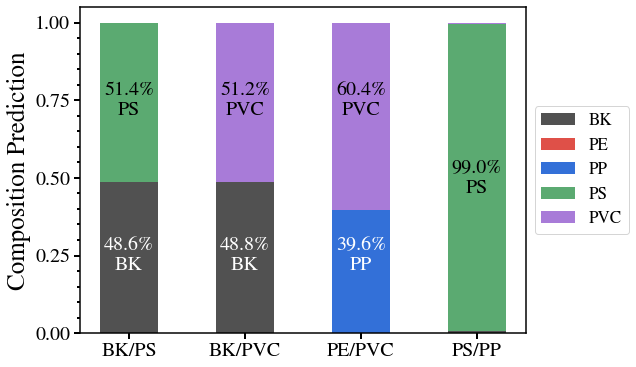

In [32]:
with open('./unseen_pickle/unseen.pickle', 'rb') as handle:
    result = pickle.load(handle)
    
result = result[:4].T / 100
BK = result[0]
PE = result[1]
PP = result[2]
PS = result[3]
PVC = result[4]

width = 0.5

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(labels, BK, width, label='BK')
ax.bar(labels, PE, width, bottom=BK, label='PE')
ax.bar(labels, PP, width, bottom=PE+BK, label='PP')
ax.bar(labels, PS, width, bottom=PP+PE+BK, label='PS')
ax.bar(labels, PVC, width, bottom=PS+PP+PE+BK, label='PVC')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])
leg = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for line in leg.get_lines():
    line.set_linewidth(3.0)

ax.set_ylabel('Composition Prediction')
ax.set_ylim([0, 1.05])

ax.text(0, 0.25, f'{BK[0]*100:0.1f}%\nBK', ha='center', va='center', color='w', fontsize=20)
ax.text(0, 0.75, f'{PS[0]*100:0.1f}%\nPS', ha='center', va='center', color='k', fontsize=20)

ax.text(1, 0.25, f'{BK[1]*100:0.1f}%\nBK', ha='center', va='center', color='w', fontsize=20)
ax.text(1, 0.75, f'{PVC[1]*100:0.1f}%\nPVC', ha='center', va='center', color='k', fontsize=20)

ax.text(2, 0.25, f'{PP[2]*100:0.1f}%\nPP', ha='center', va='center', color='w', fontsize=20)
ax.text(2, 0.75, f'{PVC[2]*100:0.1f}%\nPVC', ha='center', va='center', color='k', fontsize=20)

ax.text(3, 0.5, f'{PS[3]*100:0.1f}%\nPS', ha='center', va='center', color='k', fontsize=20)

format_axis_im(ax)

from matplotlib.ticker import (AutoMinorLocator)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3)
ax.locator_params(axis='y', nbins=5)

## Smoothed Spectra

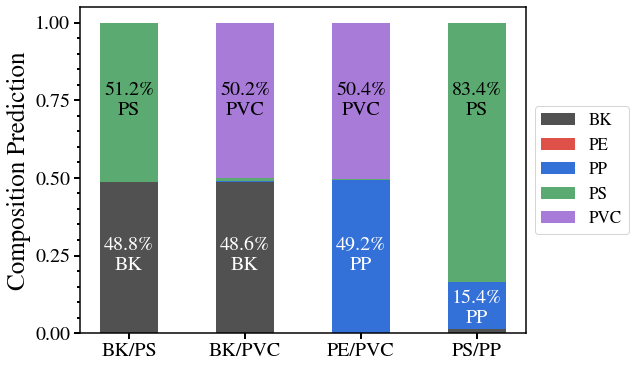

In [30]:
with open('./unseen_pickle/smooth_unseen.pickle', 'rb') as handle:
    result = pickle.load(handle)
    
result = result[:4].T / 100
BK = result[0]
PE = result[1]
PP = result[2]
PS = result[3]
PVC = result[4]

width = 0.5

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(labels, BK, width, label='BK')
ax.bar(labels, PE, width, bottom=BK, label='PE')
ax.bar(labels, PP, width, bottom=PE+BK, label='PP')
ax.bar(labels, PS, width, bottom=PP+PE+BK, label='PS')
ax.bar(labels, PVC, width, bottom=PS+PP+PE+BK, label='PVC')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])
leg = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for line in leg.get_lines():
    line.set_linewidth(3.0)

ax.set_ylabel('Composition Prediction')
ax.set_ylim([0, 1.05])

ax.text(0, 0.25, f'{BK[0]*100:0.1f}%\nBK', ha='center', va='center', color='w', fontsize=20)
ax.text(0, 0.75, f'{PS[0]*100:0.1f}%\nPS', ha='center', va='center', color='k', fontsize=20)

ax.text(1, 0.25, f'{BK[1]*100:0.1f}%\nBK', ha='center', va='center', color='w', fontsize=20)
ax.text(1, 0.75, f'{PVC[1]*100:0.1f}%\nPVC', ha='center', va='center', color='k', fontsize=20)

ax.text(2, 0.25, f'{PP[2]*100:0.1f}%\nPP', ha='center', va='center', color='w', fontsize=20)
ax.text(2, 0.75, f'{PVC[2]*100:0.1f}%\nPVC', ha='center', va='center', color='k', fontsize=20)

ax.text(3, 0.08, f'{PP[3]*100:0.1f}%\nPP', ha='center', va='center', color='w', fontsize=20)
ax.text(3, 0.75, f'{PS[3]*100:0.1f}%\nPS', ha='center', va='center', color='k', fontsize=20)

format_axis_im(ax)

from matplotlib.ticker import (AutoMinorLocator)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3)
ax.locator_params(axis='y', nbins=5)

## Detrended Spectra

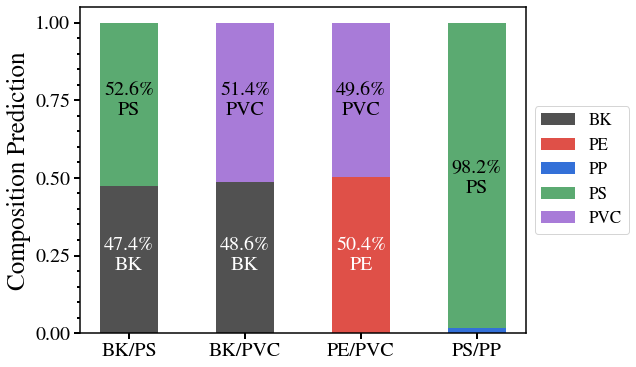

In [34]:
with open('./unseen_pickle/detrend_unseen.pickle', 'rb') as handle:
    result = pickle.load(handle)
    
result = result[:4].T / 100
BK = result[0]
PE = result[1]
PP = result[2]
PS = result[3]
PVC = result[4]

width = 0.5

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(labels, BK, width, label='BK')
ax.bar(labels, PE, width, bottom=BK, label='PE')
ax.bar(labels, PP, width, bottom=PE+BK, label='PP')
ax.bar(labels, PS, width, bottom=PP+PE+BK, label='PS')
ax.bar(labels, PVC, width, bottom=PS+PP+PE+BK, label='PVC')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])
leg = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for line in leg.get_lines():
    line.set_linewidth(3.0)

ax.set_ylabel('Composition Prediction')
ax.set_ylim([0, 1.05])

ax.text(0, 0.25, f'{BK[0]*100:0.1f}%\nBK', ha='center', va='center', color='w', fontsize=20)
ax.text(0, 0.75, f'{PS[0]*100:0.1f}%\nPS', ha='center', va='center', color='k', fontsize=20)

ax.text(1, 0.25, f'{BK[1]*100:0.1f}%\nBK', ha='center', va='center', color='w', fontsize=20)
ax.text(1, 0.75, f'{PVC[1]*100:0.1f}%\nPVC', ha='center', va='center', color='k', fontsize=20)

ax.text(2, 0.25, f'{PE[2]*100:0.1f}%\nPE', ha='center', va='center', color='w', fontsize=20)
ax.text(2, 0.75, f'{PVC[2]*100:0.1f}%\nPVC', ha='center', va='center', color='k', fontsize=20)

ax.text(3, 0.5, f'{PS[3]*100:0.1f}%\nPS', ha='center', va='center', color='k', fontsize=20)

format_axis_im(ax)

from matplotlib.ticker import (AutoMinorLocator)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3)
ax.locator_params(axis='y', nbins=5)

## Both

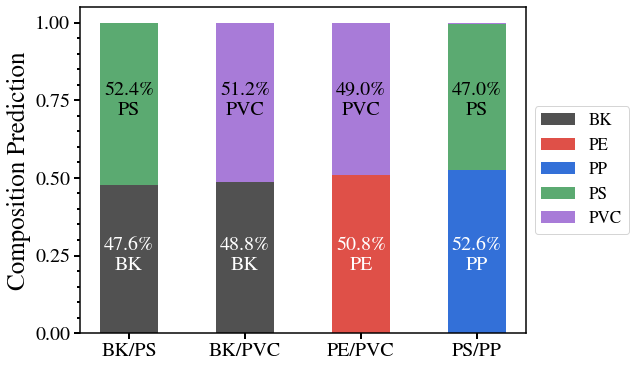

In [27]:
with open('./unseen_pickle/both_unseen.pickle', 'rb') as handle:
    result = pickle.load(handle)
    
result = result[:4].T / 100
labels = ['BK/PS', 'BK/PVC', 'PE/PVC', 'PS/PP']

BK = result[0]
PE = result[1]
PP = result[2]
PS = result[3]
PVC = result[4]

width = 0.5

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(labels, BK, width, label='BK')
ax.bar(labels, PE, width, bottom=BK, label='PE')
ax.bar(labels, PP, width, bottom=PE+BK, label='PP')
ax.bar(labels, PS, width, bottom=PP+PE+BK, label='PS')
ax.bar(labels, PVC, width, bottom=PS+PP+PE+BK, label='PVC')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])
leg = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for line in leg.get_lines():
    line.set_linewidth(3.0)

ax.set_ylabel('Composition Prediction')
ax.set_ylim([0, 1.05])

ax.text(0, 0.25, f'{BK[0]*100:0.1f}%\nBK', ha='center', va='center', color='w', fontsize=20)
ax.text(0, 0.75, f'{PS[0]*100:0.1f}%\nPS', ha='center', va='center', color='k', fontsize=20)

ax.text(1, 0.25, f'{BK[1]*100:0.1f}%\nBK', ha='center', va='center', color='w', fontsize=20)
ax.text(1, 0.75, f'{PVC[1]*100:0.1f}%\nPVC', ha='center', va='center', color='k', fontsize=20)

ax.text(2, 0.25, f'{PE[2]*100:0.1f}%\nPE', ha='center', va='center', color='w', fontsize=20)
ax.text(2, 0.75, f'{PVC[2]*100:0.1f}%\nPVC', ha='center', va='center', color='k', fontsize=20)

ax.text(3, 0.25, f'{PP[3]*100:0.1f}%\nPP', ha='center', va='center', color='w', fontsize=20)
ax.text(3, 0.75, f'{PS[3]*100:0.1f}%\nPS', ha='center', va='center', color='k', fontsize=20)

format_axis_im(ax)

from matplotlib.ticker import (AutoMinorLocator)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3)
ax.locator_params(axis='y', nbins=5)

# Unseen Quaternary Mixture Prediction

## Raw Spectra

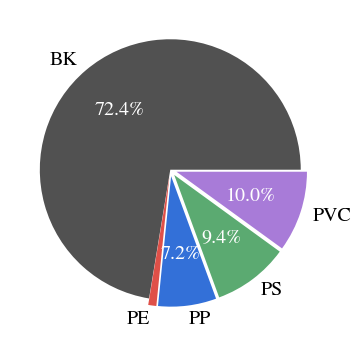

In [38]:
with open('./unseen_pickle/unseen.pickle', 'rb') as handle:
    result = pickle.load(handle)
    
result = result[4]

fig, ax = plt.subplots(figsize=(6,6))
labels = ['BK', 'PE', 'PP', 'PS', 'PVC']
explode = [0, 0.05, 0.05, 0.05, 0.05]
_, _, texts = ax.pie(result, labels=labels, 
                     explode=explode, autopct='%1.1f%%')
for text in texts:
    text.set_color('white')
    text.set_fontsize(20)
texts[1].set_text('')
format_axis_im(ax)

## Smoothed Spectra

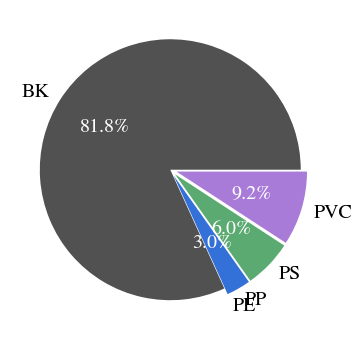

In [39]:
with open('./unseen_pickle/smooth_unseen.pickle', 'rb') as handle:
    result = pickle.load(handle)
    
result = result[4]

fig, ax = plt.subplots(figsize=(6,6))
labels = ['BK', 'PE', 'PP', 'PS', 'PVC']
explode = [0, 0.05, 0.05, 0.05, 0.05]
_, _, texts = ax.pie(result, labels=labels, 
                     explode=explode, autopct='%1.1f%%')
for text in texts:
    text.set_color('white')
    text.set_fontsize(20)
texts[1].set_text('')
format_axis_im(ax)

## Detrended Spectra

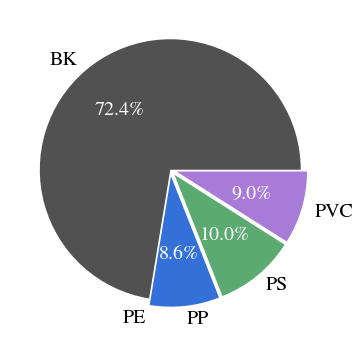

In [40]:
with open('./unseen_pickle/detrend_unseen.pickle', 'rb') as handle:
    result = pickle.load(handle)
    
result = result[4]

fig, ax = plt.subplots(figsize=(6,6))
labels = ['BK', 'PE', 'PP', 'PS', 'PVC']
explode = [0, 0.05, 0.05, 0.05, 0.05]
_, _, texts = ax.pie(result, labels=labels, 
                     explode=explode, autopct='%1.1f%%')
for text in texts:
    text.set_color('white')
    text.set_fontsize(20)
texts[1].set_text('')
format_axis_im(ax)

## Both

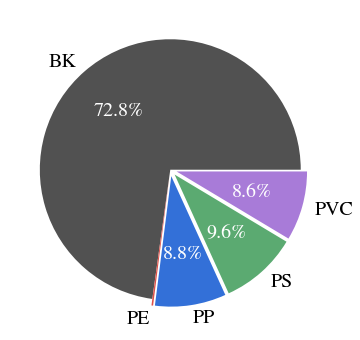

In [41]:
with open('./unseen_pickle/both_unseen.pickle', 'rb') as handle:
    result = pickle.load(handle)
    
result = result[4]

fig, ax = plt.subplots(figsize=(6,6))
labels = ['BK', 'PE', 'PP', 'PS', 'PVC']
explode = [0, 0.05, 0.05, 0.05, 0.05]
_, _, texts = ax.pie(result, labels=labels, 
                     explode=explode, autopct='%1.1f%%')
for text in texts:
    text.set_color('white')
    text.set_fontsize(20)
texts[1].set_text('')
format_axis_im(ax)